# Classification of Social Media Ads
The aim of this project is to analyse the ads we come across the social media for classifying if the audience will buy the product or not. This helps to find the customers who are more likely to buy the product based on their age and income

The dataset I am using for the task of Social Media Ads Classification is downloaded from Kaggle. It contains data about a product’s social media advertising campaign. It contains features like:

    1.The age of the target audience
    2.The estimated salary of the target audience
    3.Gender
    4.Whether the target audience has purchased the product or not

Let's import the python libraries to start the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

Now lets import dataset using Pandas

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Preprocessing 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.drop('User ID', inplace=True, axis = 1)

Now lets see some of the insights from the data to see further 

In [5]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


As we can see, the data contains details of audience of age 18 - 60. As this is the legal working age, there is no problem with this age group.

Also, in the data collected, least salary is 15,000 and highest salary is 1,50,000. Hence our dataset has audience with large range of the salary.

And the last column tells whether the person has purchased the product or not.

Let us check if there are any NaN values in our dataset

In [6]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

as there are no NaN values the work was reduced because if there are any NaN values, we need to replace them with either mean,mode,median or drop those rows based on the data.

# Exploring the data
Let's draw a pie-chart to see the distribution of audience who have purchased and who haven't.

<AxesSubplot:ylabel='Purchased'>

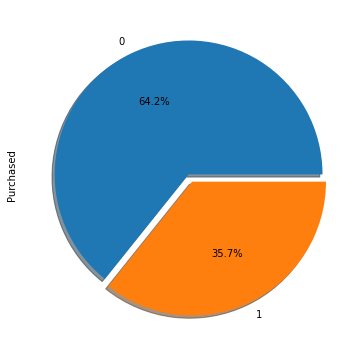

In [7]:
data['Purchased'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8), explode = [0, 0.06])

From the pie chart it is clear that only around 36% of audience who watched the ads have purchased. But yet it is a good number because turning out 36% of social media users ( who just open social media without any intention of buying) to buy the products is a good achievement.

Let's find the number of male and female in our data

In [8]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

# # Representing this in a form of Pie-Chart

<AxesSubplot:ylabel='Gender'>

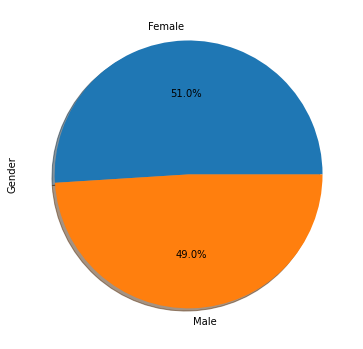

In [9]:
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8))

Let's see the numeber of male and female who have purchased the product

In [10]:
pd.crosstab(data.Gender,data.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


Visualising this with bar Chart

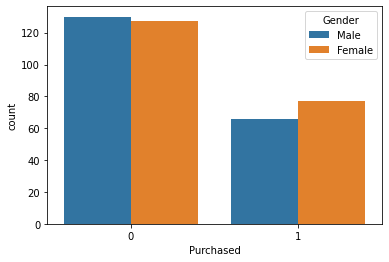

In [11]:
sns.countplot(x='Purchased', data=data, hue='Gender')
plt.show()

Around 61% of women, who have watched the ads in social media, have purchased those products Coming to men, around 51% who have watched these ads, have purchased.

let's see the salary distribution among the audience covered in our dataset

<AxesSubplot:ylabel='Frequency'>

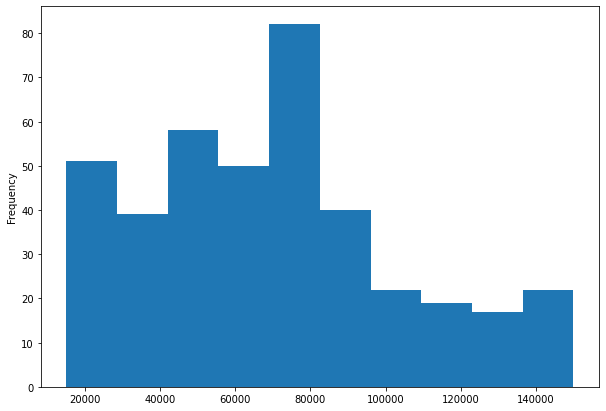

In [12]:
plt.figure(figsize=(10, 7))
data['EstimatedSalary'].plot(kind='hist')


We can see that most number of people have their income around 80K. There are less number of people who have an income of greater than 1 Lakh.

Let's see the role of income in purchasing the product

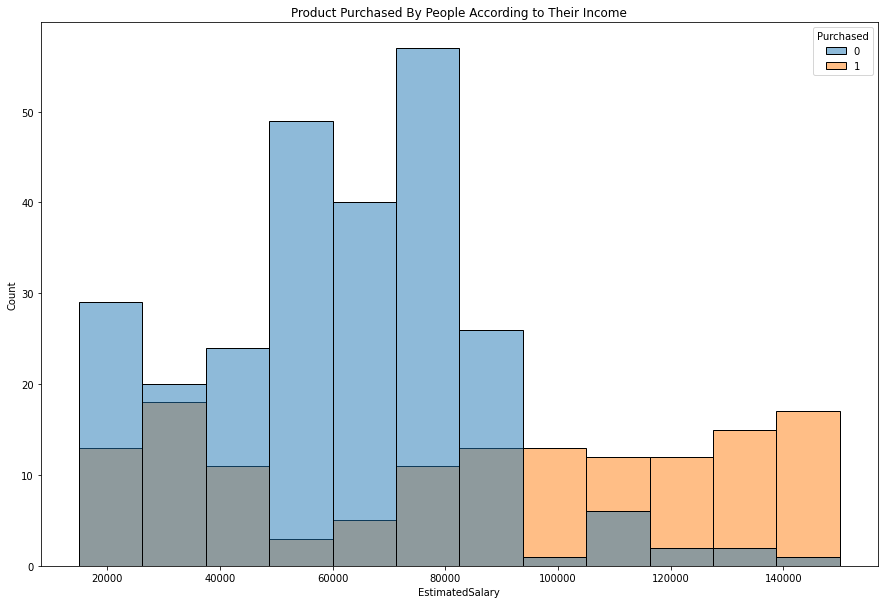

In [13]:
plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=data)
plt.show()

It is clear that the percentage of people, who buy product, is very high among those with higher income.

Let's see if Age plays any role

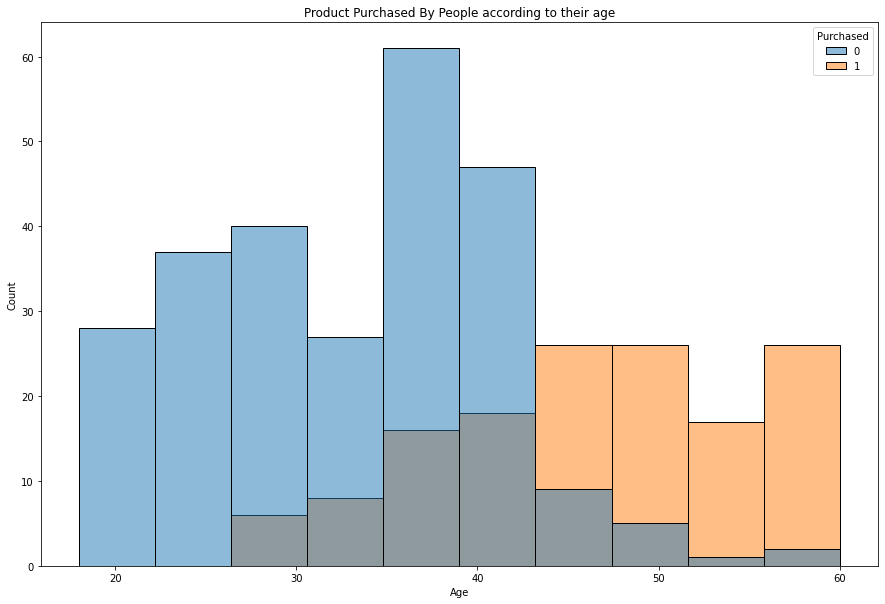

In [14]:

plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People according to their age")
sns.histplot(x="Age", hue="Purchased", data=data)
plt.show()

Those greater than 40 years are the major ones who purchased the products. This could be because, the young people usually tend to save their income and also have more expenses than the older ones. Hence one can target more on people of age > 40 through these social media ads.

Let's make a scatterplot to find the relation between these columns

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

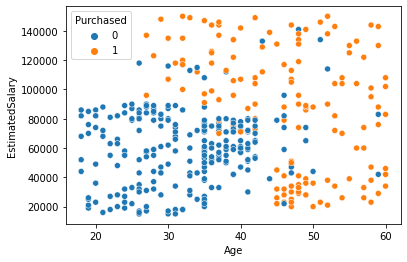

In [15]:
sns.scatterplot('Age', 'EstimatedSalary', data = data, hue = 'Purchased')

This is in accordance with the analysis done earlier.

Let's find the correlation between these variables

In [16]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:>

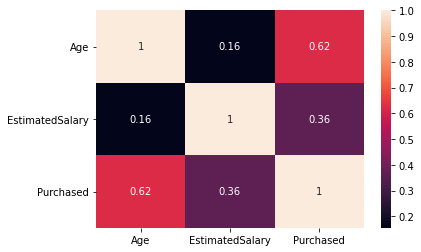

In [17]:
sns.heatmap(data.corr(), annot=True)

Number of people who purchased has a correlation of 0.62 which implies it is proportional to age. Also salary of people plays a role.

The Gender column now has no use as it has no (very less) effect on purchased.

In [18]:
data.drop('Gender', inplace=True, axis = 1)

In [19]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Training the model
The column "Purchased" is dependent and the columns "Age" and "EstimtedSalary" are independent

In [20]:
x = data.drop(columns = ['Purchased'])
y = data['Purchased']

In [21]:
x #input variable

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [22]:
y #target variable

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Scaling
Values of EstimatedSalary column are very high and hence they may dominate. So, let us scale the values of both the input columns.

In [23]:
scaling_columns=['Age','EstimatedSalary']

In [24]:
x[scaling_columns].describe().loc[['min', 'max']]

,Age,EstimatedSalary
min,18.0,15000.0
max,60.0,150000.0


Initially, the range of these values is very large before scaling. Let's scale them between 0 and 1.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
scaler.fit(x[scaling_columns])

MinMaxScaler()

In [27]:
newarr=np.array([22,25000]).reshape(1,2)
newarr=scaler.transform(newarr)
newarr

array([[0.0952381 , 0.07407407]])

In [28]:
x[scaling_columns] = scaler.transform(x[scaling_columns])

In [29]:
x.describe().loc[['min', 'max']]

,Age,EstimatedSalary
min,0.0,0.0
max,1.0,1.0


In [30]:
x

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


As we can see now the values in both the columns are between 0 and 1

Now, let's split our dataset into train and test data. As our dataset is small, we limit our test data to 10% of total data.

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=10)

Now, let's use the following Machine Learning algorithms to classify and then compare their accuracy at the end.

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Algorithm
4. Support Vector Machine Algorithm
5. K-NN Algorithm
6. Naive-Bayes Classifier

Let's initilize empty lists to store our models and respective accuracy

In [32]:
model_list = []
score_list = []

# LOGISTIC REGRESSION

In [33]:
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)

LogisticRegression()

In [34]:
score1 = accuracy_score(ytest, model1.predict(xtest))
print("Model : Logistics Regression")
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model1.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model1.predict(xtest))))

Model : Logistics Regression
Accuracy : 0.93
Recall_Score : 0.79
precission_Score : 1.00


<AxesSubplot:>

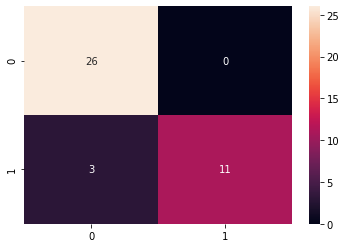

In [35]:
cm= confusion_matrix(ytest, model1.predict(xtest)) 
sns.heatmap(cm, annot=True)

We can see that 3 out of 40 are predicted wrong using logistic regression

# DECISION TREE CLASSIFIER

In [36]:
model2 = DecisionTreeClassifier()
model2.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
score2 = accuracy_score(ytest, model2.predict(xtest))
print("Model : DecisionTreeClassifier ")
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('DecisionTreeClassifier')
score_list.append(score2)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model2.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model2.predict(xtest))))

Model : DecisionTreeClassifier 
Accuracy : 0.85
Recall_Score : 0.79
precission_Score : 0.79


<AxesSubplot:>

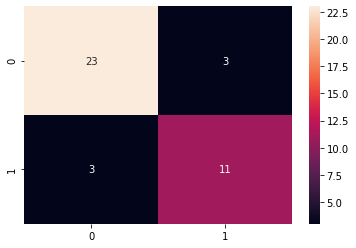

In [38]:
cm= confusion_matrix(ytest, model2.predict(xtest)) 
sns.heatmap(cm, annot=True)

6 out of 40 are predicted wrong using DecisionTreeClassifier

# RANDOM FOREST

In [39]:
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [40]:
score3 = accuracy_score(ytest, model3.predict(xtest))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('RandomForestClassifier')
score_list.append(score3)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model3.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model3.predict(xtest))))

Model : RandomForestClassifier 
Accuracy : 0.90
Recall_Score : 0.93
precission_Score : 0.81


<AxesSubplot:>

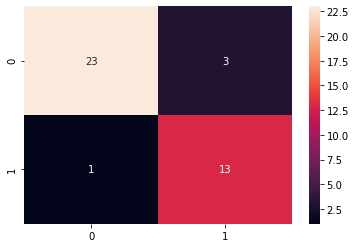

In [41]:
cm= confusion_matrix(ytest, model3.predict(xtest)) 
sns.heatmap(cm, annot=True)

4 out of 40 are predicted wrong using RandomForestClassifier

# SUPPORT VECTOR MACHINE ALGORITHM

In [42]:
model4 = SVC(kernel = 'linear', random_state = 0)
model4.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [43]:
score4 = accuracy_score(ytest, model4.predict(xtest))
print("Model : SVM ")
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('SVM')
score_list.append(score4)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model4.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model4.predict(xtest))))

Model : SVM 
Accuracy : 0.93
Recall_Score : 0.79
precission_Score : 1.00


<AxesSubplot:>

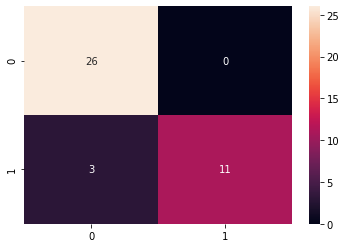

In [44]:

cm= confusion_matrix(ytest, model4.predict(xtest)) 
sns.heatmap(cm, annot=True)

3 out of 40 are predicted wrong using SVM

# K-NN CLASSIFIER 

In [45]:
model5= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model5.fit(xtrain, ytrain)

KNeighborsClassifier()

In [46]:
score5 = accuracy_score(ytest, model5.predict(xtest))
print("Model : K-NN")
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('K-NN')
score_list.append(score5)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model5.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model5.predict(xtest))))

Model : K-NN
Accuracy : 0.88
Recall_Score : 0.86
precission_Score : 0.80


<AxesSubplot:>

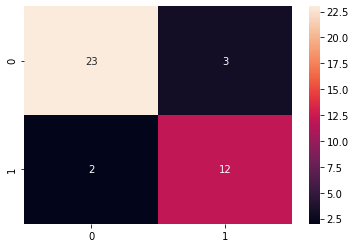

In [47]:
cm= confusion_matrix(ytest, model5.predict(xtest)) 
sns.heatmap(cm, annot=True)

5 out of 40 are predicted wrong using K-NN algorithm

# NAIVE BAYES

In [48]:
model6 = GaussianNB()  
model6.fit(xtrain, ytrain)

GaussianNB()

In [49]:
score6 = accuracy_score(ytest, model6.predict(xtest))
print("Model : Naive bayes")
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('Naive-Bayes')
score_list.append(score6)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model6.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model6.predict(xtest))))

Model : Naive bayes
Accuracy : 0.95
Recall_Score : 1.00
precission_Score : 0.88


<AxesSubplot:>

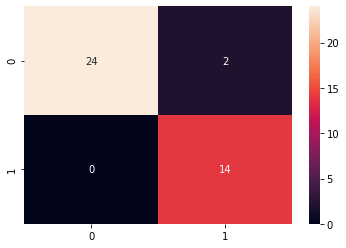

In [50]:
cm= confusion_matrix(ytest, model6.predict(xtest)) 
sns.heatmap(cm, annot=True)

<AxesSubplot:>

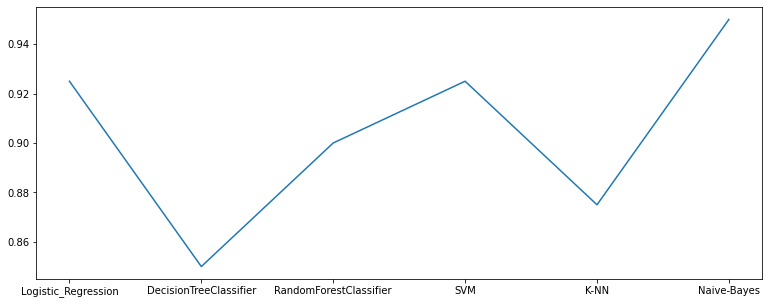

In [51]:
plt.figure(figsize=(13, 5))
sns.lineplot(model_list, score_list)

In [52]:
score_list

[0.925, 0.85, 0.9, 0.925, 0.875, 0.95]

In [53]:
model_list

['Logistic_Regression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'SVM',
 'K-NN',
 'Naive-Bayes']

<AxesSubplot:>

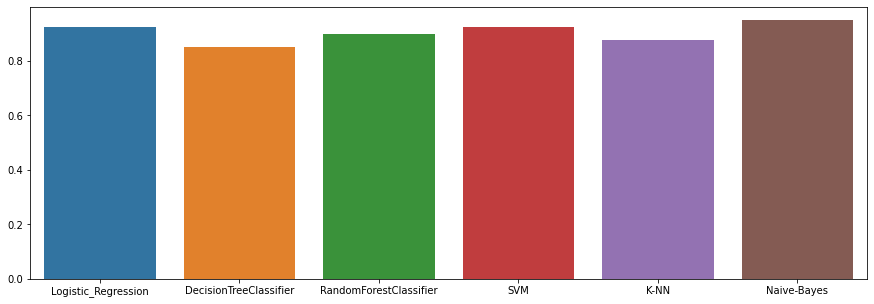

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(model_list, score_list)

In [55]:

data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


We can see that Naive Bayes algorithm gives us the best accuracy for this data set.

Let's create a Graphical User Interface for taking inputs and predicting outputs

In [56]:
from tkinter import *
from sklearn.ensemble import RandomForestClassifier

root = Tk()

age = StringVar()
age_label = Label(root,text="Enter Age ").grid(row=0,column=0,padx=40,pady=20)
age_input = Entry(root,textvariable=age)
age_input.grid(row=0,column=1,padx=40,pady=20)

salary = StringVar()
salary_label = Label(root,text="Estimated Salary ").grid(row=1,column=0,padx=40,pady=20)
salary_input = Entry(root,textvariable=salary)
salary_input.grid(row=1,column=1,padx=40,pady=20)


def Onsubmit():
    global values
    values=[]
    
    Age = float(age.get())
    values.append(Age)
    age_input.delete(0,'end')
    
    Salary = float(salary.get())
    values.append(Salary)
    salary_input.delete(0,'end')
    
    
    arr = np.array(values).reshape(1,2)

    
    
    newarr = scaler.transform(arr)
    result=model5.predict((newarr))
    Label(root,text="The probability of above person buying the product is "+str(result),font=("Arial",20)).grid(row=8,column=0,columnspan=2,padx=40,pady=20)

   

    
sub_button = Button(root,text ="Submit",command=Onsubmit).grid(row=7,columnspan=2,padx=40,pady=20)

root.mainloop()

# Conclusion
    1.Naive - Bayes classifier is performing very well.
    2.Even if we enter age and income out of the range of dataset, results seems to be meaningful.
    3.This model gives many firms a brief idea to target on which group of audience.